# Handling Missing Data [Numerical Data]
We are focusing on the handling the missing data which are in the form of the numerical values. Yes, we can handle the categorical values however we are now focusing on the numerical ones. In the next notebook we will cover that also.

Here, we will see how we can handle or fill the missing values of numerical data.

- Univariate: [`Mean`, `Median`, `Arbitary value`, `End of Distribution`, `Random values`]
- Multivariate: [`KNN Imputer`, `Iterative Imputer`]

Here, we will focus on the `Univariate Imputation` on the `Numerical Values`.

Later on we will see:
- `Univariate` on `Categorical Values`
-  `Multivariate Imputations`

# `Mean` and `Median` Imputation

We can use the `mean` and `median` as the imputation to handle the missing values.

- When your distribution is `normal` then use `mean`.
- When your distribution is `skewed` then use `median`.

## When to use Mean and Median?
- Missing completely at Random [MCAR]
- Missing value <= 5%

## What will we do?
We will use the `pandas` and `sklearn` both. Here, in `sklearn` there is a problem when we transform the columns then it converts our dataframe to numpy array.

Through `scikit` learn it is easier to deply in the production server. We can use `gridsearchCV` and other things also.

# Imputation Using Pandas

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

## Loading Titanic Dataset

In [2]:
df = pd.read_csv('/content/titanic_toy.csv')

In [3]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


## Checking Missing values

In [4]:
df.isnull().sum()

,0
Age,177
Fare,45
Family,0
Survived,0


## Setting the X and y variables

In [5]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

## Train and Test Splits

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)

X_train Shape:  (712, 3)
X_test Shape:  (179, 3)


## Calculating the Mean and Medians of both columns: `age` and `fare`

In [8]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

## Filling both the mean and median values that have been calculated above [making 4 extra columns]

In [9]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [10]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
498,25.0,151.5500,3,25.0,25.000000,151.5500,151.5500
200,28.0,9.5000,0,28.0,28.000000,9.5000,9.5000
537,30.0,106.4250,0,30.0,30.000000,106.4250,106.4250
293,24.0,8.8500,0,24.0,24.000000,8.8500,8.8500
444,NaN,8.1125,0,28.0,29.498846,8.1125,8.1125


Lets check about the variance, because we know that if we are calculating the mean and median imputation then the variance gets shrinks because most of the values has been went through calculating the mean or median. Variance is a measure of how data points differ from the mean.

## Variance of `Age` and `Fare` (Before and After the Mean and Median Imputation)

In [11]:
# Age Variance
print("Original Age variable variance: ", X_train['Age'].var())
print("Age Variance after Median Imputation: ", X_train['Age_median'].var())
print("Age Variance after Mean Imputation: ", X_train['Age_mean'].var())

# Fare Variance
print("Original Fare variable variance: ", X_train['Fare'].var())
print("Fare Variance after Median Imputation: ", X_train['Fare_median'].var())
print("Fare Variance after Mean Imputation: ", X_train['Fare_mean'].var())

Original Age variable variance:  210.2517072477438
Age Variance after Median Imputation:  169.20731007048096
Age Variance after Mean Imputation:  168.8519336687225
Original Fare variable variance:  2761.031434948639
Fare Variance after Median Imputation:  2637.01248167777
Fare Variance after Mean Imputation:  2621.2323749512393


## Change in Distribution

### `Fare`

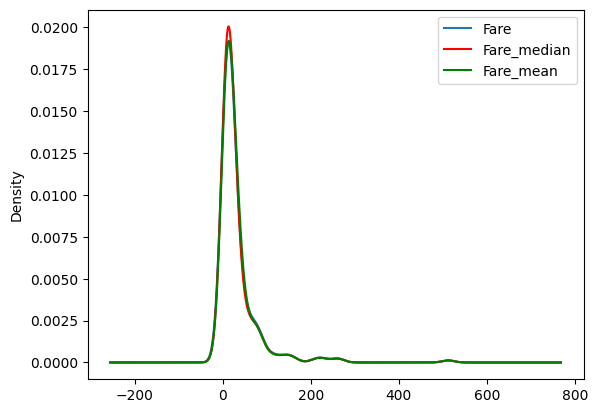

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original Variable Distribution
X_train['Fare'].plot(kind = 'kde', ax=ax)

# Variable Imputed with the Median
X_train['Fare_median'].plot(kind = 'kde', ax=ax, color = 'red')

# Variable Imputed with the Mean
X_train['Fare_mean'].plot(kind = 'kde', ax=ax, color = 'green')

# Add Legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

### `Age`

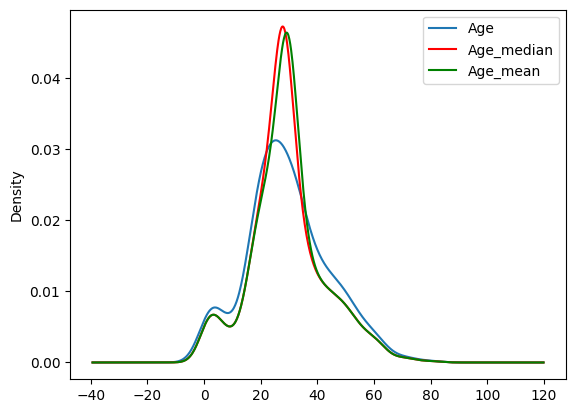

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## Covariance and Correlation
We should must check the covariance through which we can verify the column interaction to other columns. Eg: `age` to `age_median` and `age_mean` will be same and so on...


In [14]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,70.082085,71.193767
Fare,75.481375,2761.031435,18.599163,63.938058,60.224654,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.587710,-5.616299,17.672035,17.657433
Age_median,210.251707,63.938058,-5.587710,169.207310,168.851934,59.728510,60.700688
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,56.282518,57.175304
Fare_median,70.082085,2761.031435,17.672035,59.728510,56.282518,2637.012482,2621.232375
Fare_mean,71.193767,2761.031435,17.657433,60.700688,57.175304,2621.232375,2621.232375


In [15]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.087232,0.088944
Fare,0.091482,1.000000,0.207193,0.093496,0.088151,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.255307,-0.256883,0.204536,0.204981
Age_median,1.000000,0.093496,-0.255307,1.000000,0.998949,0.089416,0.091145
Age_mean,1.000000,0.088151,-0.256883,0.998949,1.000000,0.084346,0.085941
Fare_median,0.087232,1.000000,0.204536,0.089416,0.084346,1.000000,0.997003
Fare_mean,0.088944,1.000000,0.204981,0.091145,0.085941,0.997003,1.000000


## Box Plot for `Age` and `Fare`

<Axes: >

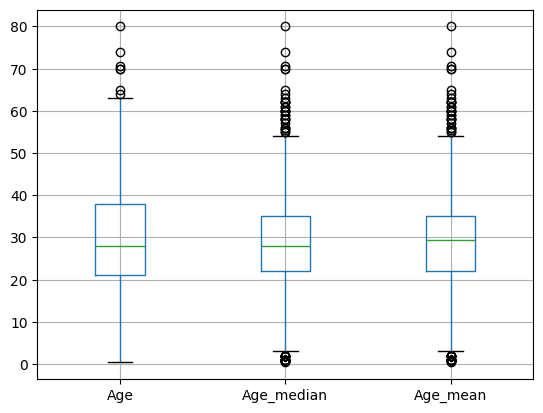

In [16]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

<Axes: >

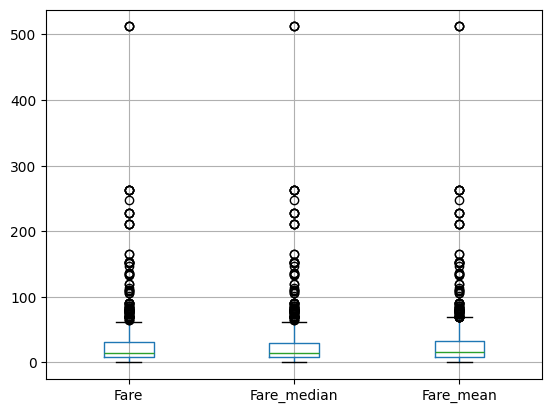

In [17]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

# Imputation using sklearn or scikit-learn

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [19]:
imputer_mean = SimpleImputer(strategy = 'mean')
imputer_median = SimpleImputer(strategy = 'median')

In [20]:
trf = ColumnTransformer([
    ('imputer_mean', imputer_mean, ['Age']),
    ('imputer_median', imputer_median, ['Fare'])
], remainder = 'passthrough')

In [21]:
trf.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer_mean', SimpleImputer(), ['Age']),
                                ('imputer_median',
                                 SimpleImputer(strategy='median'), ['Fare'])])

In [22]:
trf.named_transformers_['imputer_mean'].statistics_

array([29.78590426])

In [23]:
trf.named_transformers_['imputer_median'].statistics_

array([14.4583])

In [24]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [25]:
X_train

array([[ 40.        ,  27.7208    ,   0.        ],
       [  4.        ,  16.7       ,   2.        ],
       [ 47.        ,   9.        ,   0.        ],
       ...,
       [ 71.        ,  49.5042    ,   0.        ],
       [ 29.78590426, 221.7792    ,   0.        ],
       [ 29.78590426,  25.925     ,   0.        ]])

<hr>

# Arbitrary Value Imputation
It is most widely used in categorical data. It replace the value of `NA`  to `Missing`.

`Categorical Data -> NA -> Missing`

Same technique is used in the numerical data in which we use the arbitrary values like: 0, -1, 99, 9999, etc.

# Arbitrary Imputation using Pandas

## Importing Libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

## Loading Dataset

In [27]:
df = pd.read_csv('/content/titanic_toy.csv')

In [28]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


## Checking the missing values in each column

In [29]:
df.isnull().sum()

,0
Age,177
Fare,45
Family,0
Survived,0


## Spliting the X and y for training

In [30]:
X = df.drop(columns=['Survived'])
y = df['Survived']

## Train and Test split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

## Filling the arbitrary values in the columns `Age` and `Fare`

In [32]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

## Variance of `Age` and `Fare` (Before and After the Arbitrary Imputation)

In [33]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.3495133904614
Age Variance after 99 wala imputation:  951.7275570187172
Age Variance after -1 wala imputation:  318.0896202624484
Original Fare variable variance:  2448.197913706318
Fare Variance after 999 wala imputation:  47219.20265217623
Fare Variance after -1 wala imputation:  2378.5676784883503


## Change in Distribution

### `Age`

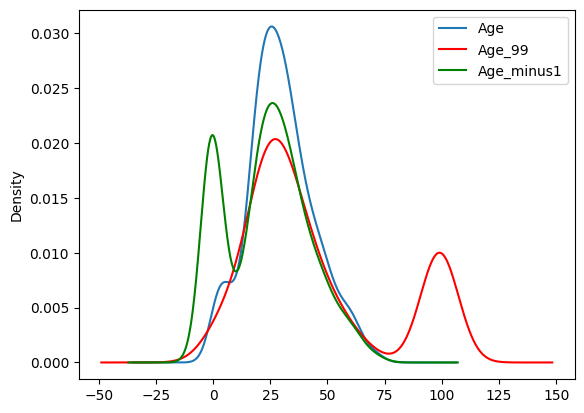

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### `Fare`

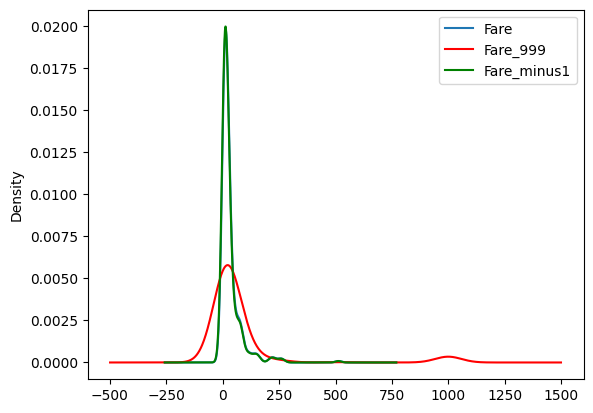

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## Covariance and Correlation
We should must check the covariance through which we can verify the column interaction to other columns. Eg: `age` to `age_99` and `age_minus1` will be same and so on...

In [36]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678


In [37]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514
Fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000


## Arbitrary Imputation using Sklearn



In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [39]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [40]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [41]:
trf.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [42]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [43]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [44]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [45]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])